# Titel

Gruppe: Gaia Capoferri, Dana Schnekenburger, Katarina Djuric

Fragen
- Welche Länder hatten in den letzten 50 Jahren die grösste Zunahme der Schuljahre?
- Was sind die Gründe dafür?

Quellen
- https://ourworldindata.org/grapher/mean-years-of-schooling-long-run?tab=chart

## 1. Daten beschaffen und laden

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# loading the data
df = pd.read_csv('mean-years-of-schooling-long-run/mean-years-of-schooling-long-run.csv', skiprows=1,
                 names=['Entity','Code','Year','Combined-average years of education for 15-64 years male and female youth and adults'])
df.head() 

,Entity,Code,Year,Combined-average years of education for 15-64 years male and female youth and adults
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01


## 2. Daten vorbereiten
- Die Roh-Daten sind bereits im Long-Format
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert eine Region, die Zeilen sind die verschiedenen Jahre - in absteigender Reihenfolge von 5 Jahren.

In [4]:
df_pivot = df.pivot(index='Entity', columns='Year', values='Combined-average years of education for 15-64 years male and female youth and adults')
df_pivot.head()

Year,1870,1875,1880,1885,1890,1895,1900,1905,1910,1915,...,1995,2000,2005,2010,2015,2020,2025,2030,2035,2040
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.01000,0.01000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.020000,...,2.400000,3.030000,3.320000,3.930000,4.810000,5.690000,6.26000,6.840000,7.380000,7.920000
Africa,0.05829,0.06893,0.084427,0.103117,0.120366,0.130437,0.148879,0.183318,0.233323,0.323424,...,4.708579,5.012495,5.446501,5.890455,6.195438,6.681866,7.18392,7.733528,8.256504,8.776776
Albania,0.02000,0.03000,0.030000,0.040000,0.050000,0.060000,0.080000,0.100000,0.150000,0.240000,...,8.540000,9.930000,10.240000,10.440000,9.990000,10.320000,10.58000,10.830000,11.100000,11.390000
Algeria,0.10000,0.13000,0.160000,0.200000,0.230000,0.270000,0.390000,0.510000,0.600000,0.580000,...,5.760000,6.060000,6.430000,7.000000,7.550000,8.180000,8.77000,9.370000,10.030000,10.590000
Argentina,0.39000,0.49000,0.590000,0.650000,0.700000,0.830000,0.970000,1.450000,1.810000,2.350000,...,8.910000,9.080000,9.570000,9.710000,9.590000,9.860000,10.13000,10.390000,10.640000,10.870000


## 3. Statistik der Roh-Daten (Analyse in Long-Format)

über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte *Entity* enthält 146 verschieden Entity 
- Die Spalte *Codes* enthält 146 verschiedene Codes
- Die Daten zwischen 1870 und 2040 sind vorhanden. Wir untersuchen nur von 1970 bis 2020
- Die Combined-average years of education for 15-64 years male and female youth and adults streut zwischen 1 und 1374

In [5]:
df.dtypes

Entity                                                                                   object
Code                                                                                     object
Year                                                                                      int64
Combined-average years of education for 15-64 years male and female youth and adults    float64
dtype: object

### 3.1 Analyse Entity

In [6]:
print('Anzahl verschiedener Entities: ', len(df['Entity'].unique()))

Anzahl verschiedener Entities:  153


In [7]:
# Anzahl Datenpunkte pro Entity
df['Entity'].value_counts()

Entity
Afghanistan                 35
Italy                       35
Peru                        35
Paraguay                    35
Panama                      35
                            ..
Central African Republic     6
Maldives                     6
Burundi                      6
Macao                        6
Israel                       6
Name: count, Length: 153, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Entity'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

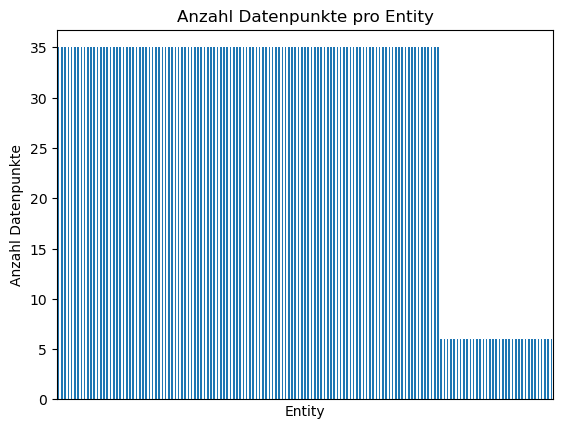

In [8]:
df['Entity'].value_counts().plot(kind='bar',
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Entity')

### 3.2 Analyse Codes

In [9]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  148


In [10]:
# Anzahl Datenpunkte pro Entity
df['Code'].value_counts()

Code
AFG    35
POL    35
PER    35
PRY    35
PAN    35
       ..
MDA     6
BDI     6
LTU     6
BRN     6
ISR     6
Name: count, Length: 147, dtype: int64

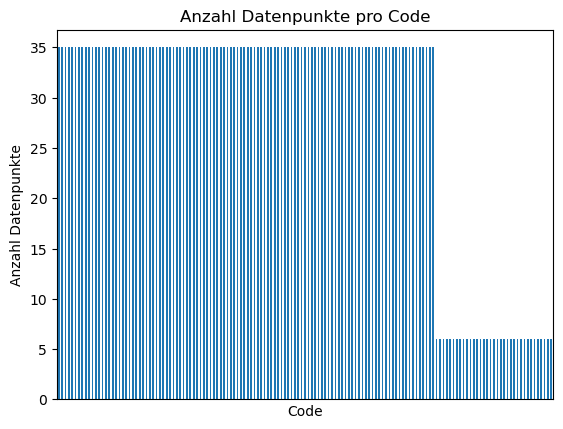

In [11]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Year

In [12]:
print('Anzahl verschiedener Years: ', len(df['Year'].unique()))

Anzahl verschiedener Years:  35


In [13]:
# Anzahl Datenpunkte pro Year
df['Year'].value_counts().sort_index()

Year
1870    118
1875    118
1880    118
1885    118
1890    118
1895    118
1900    118
1905    118
1910    118
1915    118
1920    118
1925    118
1930    118
1935    118
1940    118
1945    118
1950    118
1955    118
1960    118
1965    118
1970    118
1975    118
1980    118
1985    118
1990    118
1995    118
2000    118
2005    118
2010    118
2015    153
2020    153
2025    153
2030    153
2035    153
2040    153
Name: count, dtype: int64

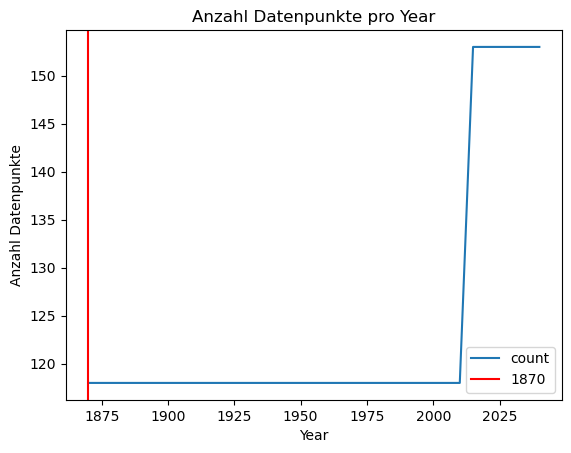

In [14]:
# Years mit maximaler Anzahl Datenpunkte (153)
g = df['Year'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Year');
g.axvline(x=1870, color='red', label='1870') # rote Linie bei 1870 - ab hier sind alle Years enthalten
g.legend()  # Legende anzeigen

### 3.4 Analyse Combined-average years of education for 15-64 years male and female youth and adults

In [15]:
df.describe()

,Year,Combined-average years of education for 15-64 years male and female youth and adults
count,4340.000000,4340.000000
mean,1958.508065,4.737778
std,51.698986,4.131335
min,1870.000000,0.000000
25%,1915.000000,0.817500
50%,1960.000000,3.740000
75%,2005.000000,8.192500
max,2040.000000,15.480000


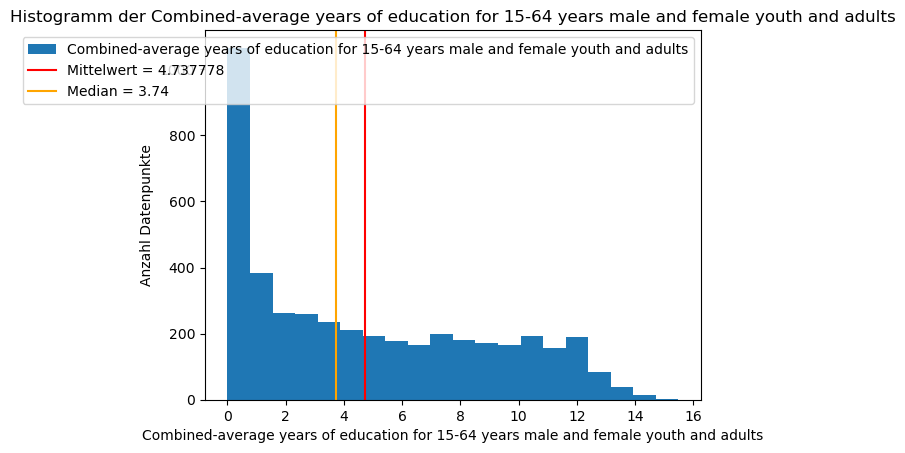

In [18]:
g = df['Combined-average years of education for 15-64 years male and female youth and adults'].plot(kind='hist', bins=20, title='Histogramm der Combined-average years of education for 15-64 years male and female youth and adults',
                                                                                                    xlabel='Combined-average years of education for 15-64 years male and female youth and adults', ylabel='Anzahl Datenpunkte')
mean = df['Combined-average years of education for 15-64 years male and female youth and adults'].mean()
g.axvline(x=df['Combined-average years of education for 15-64 years male and female youth and adults'].mean(), color='red',label=f'Mittelwert = {mean:2f}')  # rote Linie bei Mittelwert

median = df['Combined-average years of education for 15-64 years male and female youth and adults'].median()
g.axvline(x=df['Combined-average years of education for 15-64 years male and female youth and adults'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()